<a href="https://colab.research.google.com/github/pachterlab/BI-1C-2024/blob/main/worm_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was prepared by Catherine Felce

# Worm Connectome

## Import Data and Create Graph

Treat the connectome as an undirected graph (we could have added directionality information). See wormatlas for details: https://www.wormatlas.org/neuronalwiring.html.

--2024-02-01 19:52:15--  https://www.wormatlas.org/images/NeuronConnect.xls
Resolving www.wormatlas.org (www.wormatlas.org)... 140.82.7.7
Connecting to www.wormatlas.org (www.wormatlas.org)|140.82.7.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 518144 (506K) [application/vnd.ms-excel]
Saving to: ‘NeuronConnect.xls.2’

NeuronConnect.xls.2 100%[===================>] 506.00K  --.-KB/s    in 0.09s   

2024-02-01 19:52:16 (5.24 MB/s) - ‘NeuronConnect.xls.2’ saved [518144/518144]



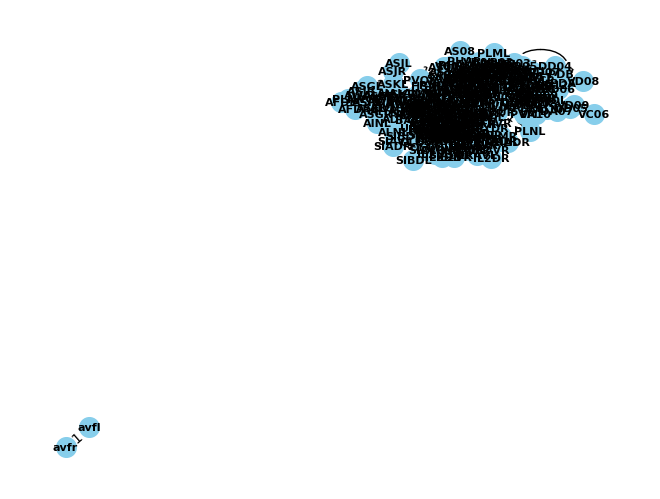

Graph information:
Number of nodes: 283
Number of edges: 2406
Nodes: ['ADAR', 'ADAL', 'ADFL', 'ASHL', 'AVDR', 'PVQL', 'ADEL', 'AIAL', 'AIBL', 'AIBR', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVEL', 'AVJR', 'AWAL', 'FLPR', 'PVPL', 'PVR', 'RICL', 'RICR', 'RIML', 'RIPL', 'RMGL', 'SMDVR', 'ADFR', 'ASHR', 'PVQR', 'ADER', 'AIAR', 'AVAL', 'AVJL', 'RIMR', 'RIPR', 'RIVR', 'RMGR', 'SMDVL', 'URBR', 'AINL', 'AVKR', 'ALA', 'AVL', 'BDUL', 'CEPDL', 'FLPL', 'IL1L', 'IL2L', 'OLLL', 'RIAL', 'RIFL', 'RIGL', 'RIGR', 'RIH', 'RIVL', 'RMDL', 'RMHL', 'SIADR', 'SIBDR', 'SMBDR', 'URBL', 'AVKL', 'ALNR', 'AVER', 'AVM', 'BDUR', 'CEPDR', 'IL2R', 'OLLR', 'RMDR', 'SAAVR', 'AIZL', 'AUAL', 'AWBL', 'OLQVL', 'RIR', 'SMBVL', 'AIYR', 'AIZR', 'ASEL', 'AUAR', 'AVHL', 'AWAR', 'AWBR', 'PVPR', 'RIAR', 'SMBVR', 'URXR', 'ADLR', 'ADLL', 'ASER', 'AVHR', 'CEPVL', 'SDQR', 'AWCR', 'PVCL', 'AFDR', 'AFDL', 'AINR', 'AIYL', 'ASIL', 'AIML', 'ASGL', 'ASIR', 'ASKL', 'AWCL', 'HSNL', 'AIMR', 'ASGR', 'ASKR', 'RIFR', 'DVC', 'PVT', 'BAGL', 'HSNR', 'RIBR'

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

! wget 'https://www.wormatlas.org/images/NeuronConnect.xls'

# Read CSV file into a DataFrame
csv_file_path = '/content/NeuronConnect.xls'  # Replace with your actual file path
df = pd.DataFrame(pd.read_excel(csv_file_path))

# Create a graph from the DataFrame (treat as undirected)
G = nx.from_pandas_edgelist(df, 'Neuron 1', 'Neuron 2', edge_attr='Nbr')

# Visualize the graph, excluding specified nodes
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=10)
labels = nx.get_edge_attributes(G, 'Nbr')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the plot
plt.show()

# Print interesting features
print("Graph information:")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# # Fraction of nodes each node is connected to.
# print("Degree centrality:", nx.degree_centrality(G))
# print("Betweenness centrality:", nx.betweenness_centrality(G))
# print("Closeness centrality:", nx.closeness_centrality(G))


## Examine properties of individual components.

Separate the graph into connected components and examine the properties of each component.

N.B. Diameter of the graph is the maximum eccentricity of a node. The eccentricity of a node is the maximum distance to another node.

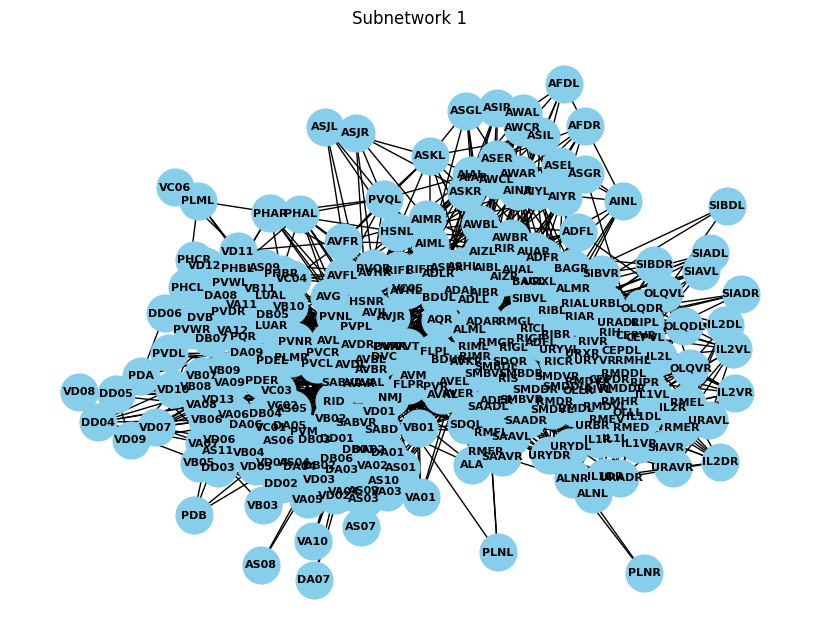

Is the graph connected: True
Diameter of the graph: 4
Degree of each node: [('ADAR', 22), ('ADAL', 25), ('ADFL', 10), ('ASHL', 20), ('AVDR', 55), ('PVQL', 14), ('ADEL', 29), ('AIAL', 21), ('AIBL', 34), ('AIBR', 39), ('AVAR', 93), ('AVBL', 75), ('AVBR', 74), ('AVDL', 44), ('AVEL', 55), ('AVJR', 29), ('AWAL', 9), ('FLPR', 16), ('PVPL', 23), ('PVR', 30), ('RICL', 25), ('RICR', 24), ('RIML', 30), ('RIPL', 17), ('RMGL', 29), ('SMDVR', 17), ('ADFR', 18), ('ASHR', 22), ('PVQR', 24), ('ADER', 24), ('AIAR', 17), ('AVAL', 92), ('AVJL', 31), ('RIMR', 32), ('RIPR', 16), ('RIVR', 17), ('RMGR', 24), ('SMDVL', 19), ('URBR', 14), ('AINL', 9), ('AVKR', 25), ('ALA', 8), ('AVL', 28), ('BDUL', 11), ('CEPDL', 20), ('FLPL', 15), ('IL1L', 13), ('IL2L', 14), ('OLLL', 18), ('RIAL', 33), ('RIFL', 15), ('RIGL', 33), ('RIGR', 25), ('RIH', 32), ('RIVL', 13), ('RMDL', 24), ('RMHL', 10), ('SIADR', 4), ('SIBDR', 7), ('SMBDR', 18), ('URBL', 12), ('AVKL', 34), ('ALNR', 8), ('AVER', 56), ('AVM', 19), ('BDUR', 13), ('CEP

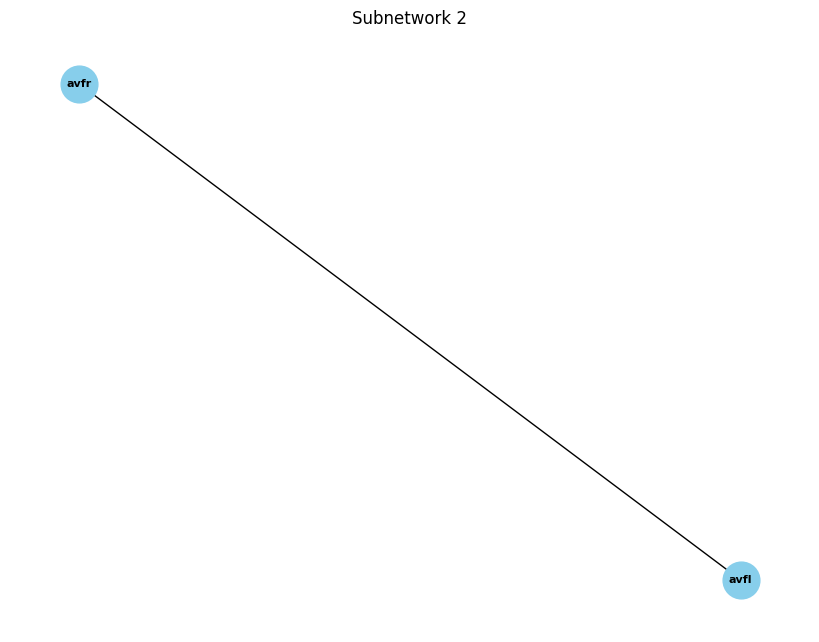

Is the graph connected: True
Diameter of the graph: 1
Degree of each node: [('avfl', 1), ('avfr', 1)]
Average clustering coefficient: 0.0
Node with maximum degree: ('avfl', 1)
Shortest path from node 1 to node 2: ['avfl', 'avfr']
Density of the graph: 1.0
Eccentricity of each node: {'avfl': 1, 'avfr': 1}
Global clustering coefficient: 0
Center of the graph: ['avfl', 'avfr']


In [9]:
# Find weakly connected components
connected_components = list(nx.connected_components(G))

# Visualize each weakly connected component separately
for i, component in enumerate(connected_components):
    subgraph = G.subgraph(component)
    pos = nx.spring_layout(subgraph)

    plt.figure(figsize=(8, 6))
    nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=10)
    plt.title(f"Subnetwork {i+1}")
    plt.show()

    # Print additional characteristics
    print("Is the graph connected:", nx.is_connected(subgraph))
    print("Diameter of the graph:", nx.diameter(subgraph))

    # More properties
    node1, node2 = [i for i in subgraph.nodes().keys()][0], [i for i in subgraph.nodes().keys()][1]
    print("Degree of each node:", subgraph.degree())
    print("Average clustering coefficient:", nx.average_clustering(subgraph))
    print("Node with maximum degree:", max(subgraph.degree, key=lambda x: x[1]))
    print("Shortest path from node 1 to node 2:", nx.shortest_path(subgraph, source=node1, target=node2))
    print("Density of the graph:", nx.density(subgraph))
    print("Eccentricity of each node:", nx.eccentricity(subgraph))
    print("Global clustering coefficient:", nx.transitivity(subgraph))
    print("Center of the graph:", nx.center(subgraph))

# # Print interesting features for the entire graph
# print("Graph information:")
# print("Number of nodes:", G.number_of_nodes())
# print("Number of edges:", G.number_of_edges())
# print("Nodes:", G.nodes())
# print("Edges:", G.edges())

## Does the network subdivide?

Can we split the network into natural subnetwork by adjusting the k, the k-edge connectedness of each subnetwork?

From Wiki:
"In graph theory, a connected graph is k-edge-connected if it remains connected whenever fewer than k edges are removed.
The edge-connectivity of a graph is the largest k for which the graph is k-edge-connected."



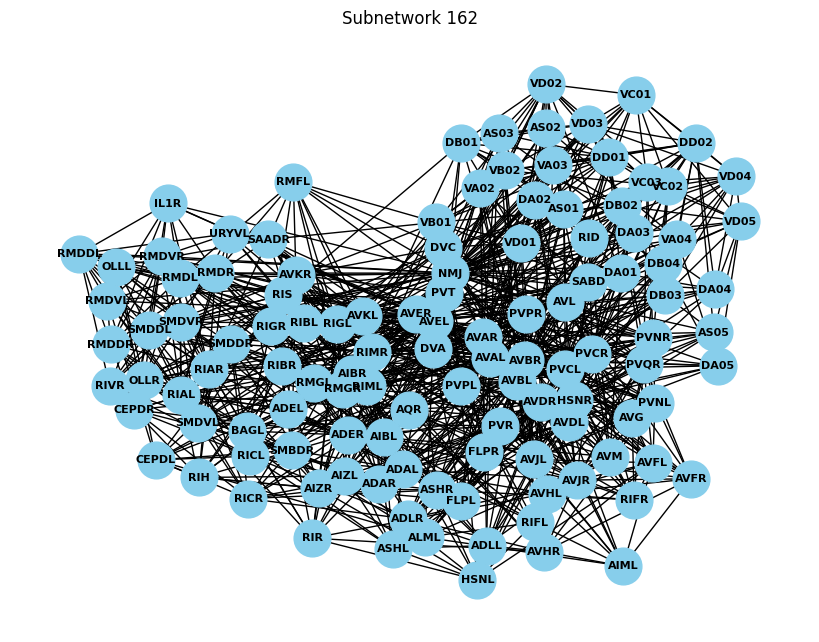

In [10]:
from networkx import k_edge_subgraphs

k=3
ks = k_edge_subgraphs(G, 11)

for i, component in enumerate(ks):
    subgraph = G.subgraph(component)
    pos = nx.spring_layout(subgraph)

    ## Only print the output if there is more than one node in the component.
    if len(component) != 1:
      plt.figure(figsize=(8, 6))
      nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=10)
      plt.title(f"Subnetwork {i+1}")
      plt.show()

## How powerful is a neural network with similar size?

Design a neural network with a similar number of nodes, and try to match the metrics given for the worm connectome.

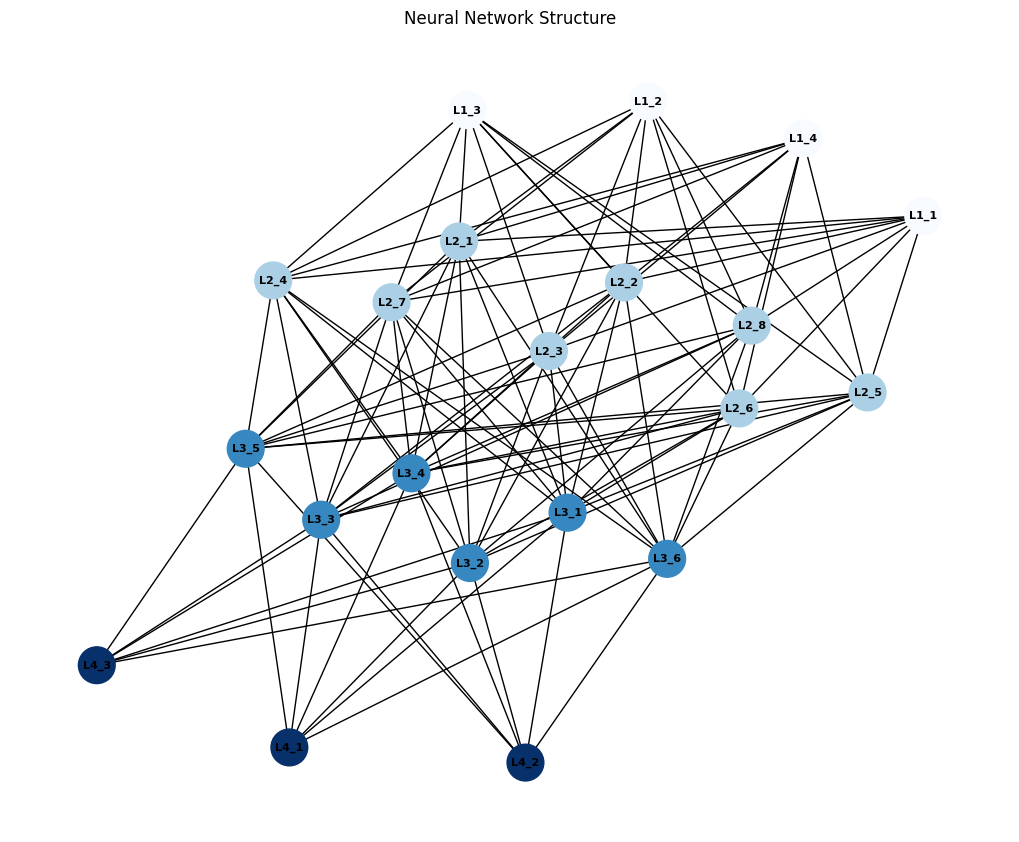


Synthetic Network information:
Number of nodes: 21
Number of edges: 98
Is the graph connected: True
Diameter of the graph: 3
Degree of each node: [('L1_1', 8), ('L1_2', 8), ('L1_3', 8), ('L1_4', 8), ('L2_1', 10), ('L2_2', 10), ('L2_3', 10), ('L2_4', 10), ('L2_5', 10), ('L2_6', 10), ('L2_7', 10), ('L2_8', 10), ('L3_1', 11), ('L3_2', 11), ('L3_3', 11), ('L3_4', 11), ('L3_5', 11), ('L3_6', 11), ('L4_1', 6), ('L4_2', 6), ('L4_3', 6)]
Average clustering coefficient: 0.0
Node with maximum degree: ('L3_1', 11)
Shortest path from node 1 to node 2: ['L1_1', 'L2_1', 'L1_2']
Density of the graph: 0.4666666666666667
Eccentricity of each node: {'L1_1': 3, 'L1_2': 3, 'L1_3': 3, 'L1_4': 3, 'L2_1': 2, 'L2_2': 2, 'L2_3': 2, 'L2_4': 2, 'L2_5': 2, 'L2_6': 2, 'L2_7': 2, 'L2_8': 2, 'L3_1': 2, 'L3_2': 2, 'L3_3': 2, 'L3_4': 2, 'L3_5': 2, 'L3_6': 2, 'L4_1': 3, 'L4_2': 3, 'L4_3': 3}
Global clustering coefficient: 0
Center of the graph: ['L2_1', 'L2_2', 'L2_3', 'L2_4', 'L2_5', 'L2_6', 'L2_7', 'L2_8', 'L3_1', '

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a feedforward neural network graph
def create_neural_network_graph(layer_sizes):
    G = nx.Graph()

    # Add nodes for each layer
    for i, size in enumerate(layer_sizes):
        for j in range(size):
            node_id = f'L{i+1}_{j+1}'  # Node ID format: L<Layer Number>_<Node Number>
            G.add_node(node_id, layer=i + 1)

    # Add edges connecting nodes between layers
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                source_node = f'L{i+1}_{j+1}'
                target_node = f'L{i+2}_{k+1}'
                G.add_edge(source_node, target_node)

    return G

# Specify the neural network architecture (number of nodes in each layer)
layer_sizes = [4, 8, 6, 3]

# Create the neural network graph
neural_network_graph = create_neural_network_graph(layer_sizes)

# Visualize the neural network graph
pos = nx.spring_layout(neural_network_graph)
node_colors = [neural_network_graph.nodes[node]['layer'] for node in neural_network_graph.nodes]
plt.figure(figsize=(10, 8))
nx.draw(neural_network_graph, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.Blues, font_size=8, font_color='black', font_weight='bold', arrowsize=10)

plt.title("Neural Network Structure")
plt.show()

# Print interesting features for the synthetic network
print("\nSynthetic Network information:")
print("Number of nodes:", neural_network_graph.number_of_nodes())
print("Number of edges:", neural_network_graph.number_of_edges())

# Print additional characteristics
print("Is the graph connected:", nx.is_connected(neural_network_graph))
print("Diameter of the graph:", nx.diameter(neural_network_graph))

# More properties
node1, node2 = [i for i in neural_network_graph.nodes().keys()][0], [i for i in neural_network_graph.nodes().keys()][1]
print("Degree of each node:", neural_network_graph.degree())
print("Average clustering coefficient:", nx.average_clustering(neural_network_graph))
print("Node with maximum degree:", max(neural_network_graph.degree, key=lambda x: x[1]))
print("Shortest path from node 1 to node 2:", nx.shortest_path(neural_network_graph, source=node1, target=node2))
print("Density of the graph:", nx.density(neural_network_graph))
print("Eccentricity of each node:", nx.eccentricity(neural_network_graph))
print("Global clustering coefficient:", nx.transitivity(neural_network_graph))
print("Center of the graph:", nx.center(neural_network_graph))

## Compare connectivities of networks.

In [12]:
# ## Uncomment to find average connectivity of the networks (takes 5 mins to run).
# worm_connectivity = nx.average_node_connectivity(G)
# nn_connectivity = nx.average_node_connectivity(neural_network_graph)
# print('worm:', worm_connectivity)
# print('neural net:', nn_connectivity)